<a href="https://colab.research.google.com/github/KondamPravalikaReddy/AirAware-Smart-Air-Quality-Prediction/blob/main/MileStone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install & Setup Kaggle API
!pip install kaggle -q

In [ ]:
# Upload kaggle.json (from your Kaggle account → API → Create New Token)
from google.colab import files
files.upload()   # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravalikareddi","key":"cc23ca85e0877e600aaa326978d10bad"}'}

In [ ]:
# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset
!kaggle datasets download -d taweilo/taiwan-air-quality-data-20162024 -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024
License(s): CC0-1.0
 74% 127M/172M [00:00<00:00, 1.33GB/s]
100% 172M/172M [00:00<00:00, 1.12GB/s]


In [ ]:
# 3. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 4. Load Dataset
import pandas as pd
df = pd.read_csv("air_quality.csv", low_memory=False) # file name after unzip
print("Original Data:\n")
print(df.head())

Original Data:

               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0   40.2  ...       2.3       225  NaN    0.2      20.1     26.0   
1  0.32  27.9   35.1  ...       1.1       184  NaN    0.2      15.3     23.0   
2  0.17  25.1   40.6  ...       0.4       210  NaN    0.2      13.8     24.0   
3   0.2  30.0   35.9  ...       1.9       239  NaN    0.2      13.0     26.0   
4  0.16  33.5   35.9  ...       1.8       259  NaN    0.1      15.3     28.0   

  so2_avg   long

In [ ]:
# Data Cleaning

# Check null values
print("\nMissing Values:\n", df.isnull().sum())

# Convert 'pm2.5', 'pm10', and 'o3' to numeric, coercing errors to NaN
df['pm2.5'] = pd.to_numeric(df['pm2.5'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')


# Example: fill numeric columns with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())


# Example: fill categorical/text columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check null values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values:
 date              85
sitename           0
county             0
aqi                0
pollutant          0
status             0
so2                0
co                 0
o3                 0
o3_8hr             0
pm10               0
pm2.5              0
no2                0
nox                0
no                 0
windspeed          0
winddirec          0
unit         5881862
co_8hr             0
pm2.5_avg          0
pm10_avg           0
so2_avg            0
longitude          0
latitude           0
siteid             0
Year              85
Month             85
dtype: int64

Missing Values After Cleaning:
 date              85
sitename           0
county             0
aqi                0
pollutant          0
status             0
so2                0
co                 0
o3                 0
o3_8hr             0
pm10               0
pm2.5              0
no2                0
nox                0
no                 0
windspeed          0
winddirec          0
unit        

In [ ]:
#  Basic Overview
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe())


Shape: (5882189, 25)

Data Types:
 date         datetime64[ns]
sitename             object
county               object
aqi                 float64
pollutant            object
status               object
so2                  object
co                   object
o3                   object
o3_8hr               object
pm10                 object
pm2.5                object
no2                  object
nox                  object
no                   object
windspeed            object
winddirec            object
unit                float64
co_8hr               object
pm2.5_avg            object
pm10_avg             object
so2_avg              object
longitude           float64
latitude            float64
siteid              float64
dtype: object

Summary Stats:
                                 date           aqi  unit     longitude  \
count                        5882104  5.882189e+06   0.0  5.882189e+06   
mean   2020-11-22 10:44:45.515795200  5.419279e+01   NaN  1.208235e+02   
min        

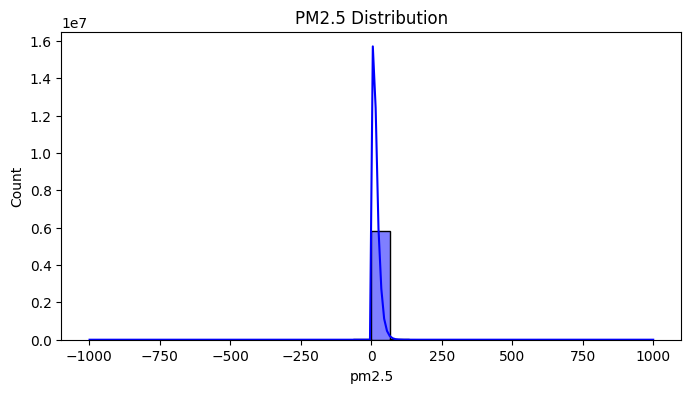

In [ ]:
#  Univariate Analysis
plt.figure(figsize=(8,4))
sns.histplot(df["pm2.5"], kde=True, color="blue", bins=30)
plt.title("PM2.5 Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["pm2.5"], color="orange")
plt.title("PM2.5 Boxplot")
plt.show()

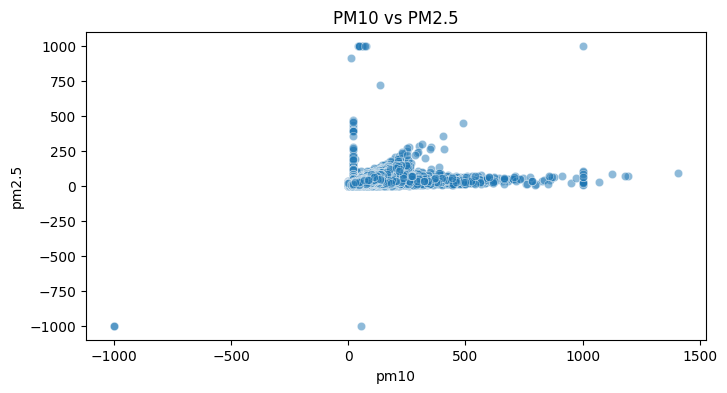

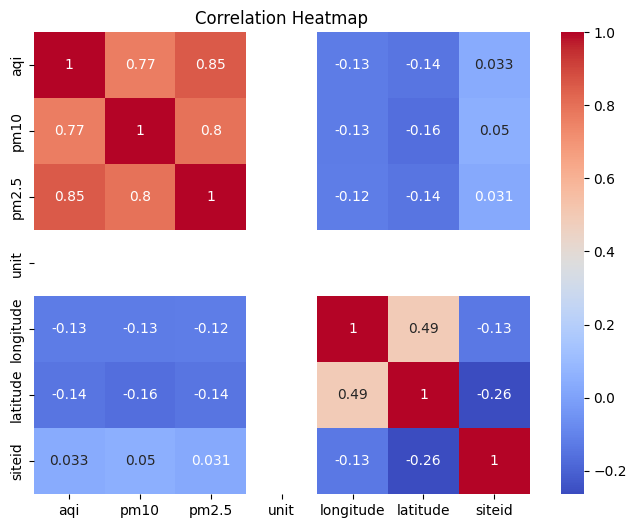

In [ ]:
#  Bivariate Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x="pm10", y="pm2.5", data=df, alpha=0.5)
plt.title("PM10 vs PM2.5")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

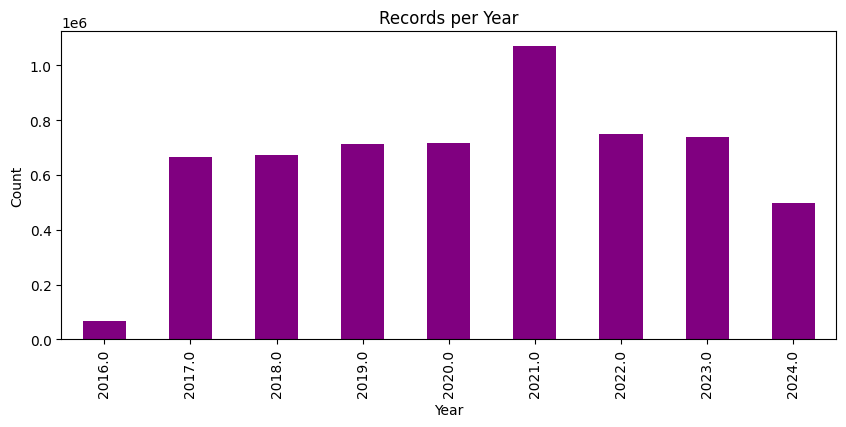

In [ ]:
#  Date-Time Analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

plt.figure(figsize=(10,4))
df["Year"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

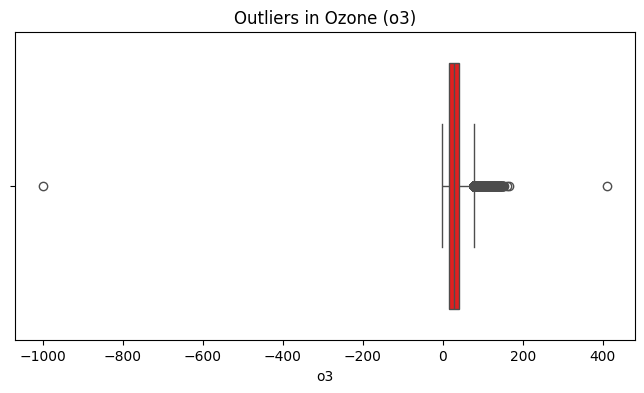

In [ ]:
#  Outlier Detection
plt.figure(figsize=(8,4))
sns.boxplot(x=df["o3"], color="red")
plt.title("Outliers in Ozone (o3)")
plt.show()

In [ ]:
#  Save Cleaned Dataset
df.to_csv("taiwan_air_quality_cleaned.csv", index=False)
print("\n Cleaned & EDA-ready dataset saved as 'taiwan_air_quality_cleaned.csv'")


 Cleaned & EDA-ready dataset saved as 'taiwan_air_quality_cleaned.csv'


In [5]:
#  Setup: Install and Import Libraries

!pip install kaggle -q
!pip install xgboost -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [6]:
#  Load the Dataset

df = pd.read_csv("air_quality.csv", low_memory=False)
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


 Dataset Loaded Successfully!
Shape: (5882208, 25)


,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,...,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,...,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,...,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,...,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,...,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0


In [7]:
#  Basic Info and Missing Values

print("\n--- Basic Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882208 entries, 0 to 5882207
Data columns (total 25 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   sitename   object 
 2   county     object 
 3   aqi        float64
 4   pollutant  object 
 5   status     object 
 6   so2        object 
 7   co         object 
 8   o3         object 
 9   o3_8hr     object 
 10  pm10       object 
 11  pm2.5      object 
 12  no2        object 
 13  nox        object 
 14  no         object 
 15  windspeed  object 
 16  winddirec  object 
 17  unit       float64
 18  co_8hr     object 
 19  pm2.5_avg  object 
 20  pm10_avg   object 
 21  so2_avg    object 
 22  longitude  float64
 23  latitude   float64
 24  siteid     float64
dtypes: float64(5), object(20)
memory usage: 1.1+ GB
None

--- Missing Values ---
date               0
sitename           0
county             0
aqi            43020
pollutant    3235012
status        142718
so2        

In [8]:
#  Data Cleaning

# Convert pollutant columns to numeric
for col in ['pm2.5', 'pm10', 'o3']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Data Cleaning Done!")


 Data Cleaning Done!



--- Statistical Summary ---
                aqi            o3          pm10         pm2.5  unit  \
count  5.882208e+06  5.882208e+06  5.882208e+06  5.882208e+06   0.0   
mean   5.419277e+01  3.042044e+01  3.438227e+01  1.684545e+01   NaN   
std    2.974925e+01  1.802696e+01  2.398997e+01  1.249928e+01   NaN   
min   -1.000000e+00 -9.990000e+02 -9.990000e+02 -9.990000e+02   NaN   
25%    3.200000e+01  1.650000e+01  1.800000e+01  8.000000e+00   NaN   
50%    4.700000e+01  2.910000e+01  2.900000e+01  1.400000e+01   NaN   
75%    7.000000e+01  4.140000e+01  4.400000e+01  2.200000e+01   NaN   
max    5.000000e+02  4.100000e+02  1.407000e+03  1.000000e+03   NaN   

          longitude      latitude        siteid  
count  5.882208e+06  5.882208e+06  5.882208e+06  
mean   1.208235e+02  2.404500e+01  5.608608e+01  
std    8.845717e-01  9.190606e-01  5.205919e+01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.204097e+02  2.346278e+01  3.100000e+01  
50%    1.208235e+02  2.404500e+

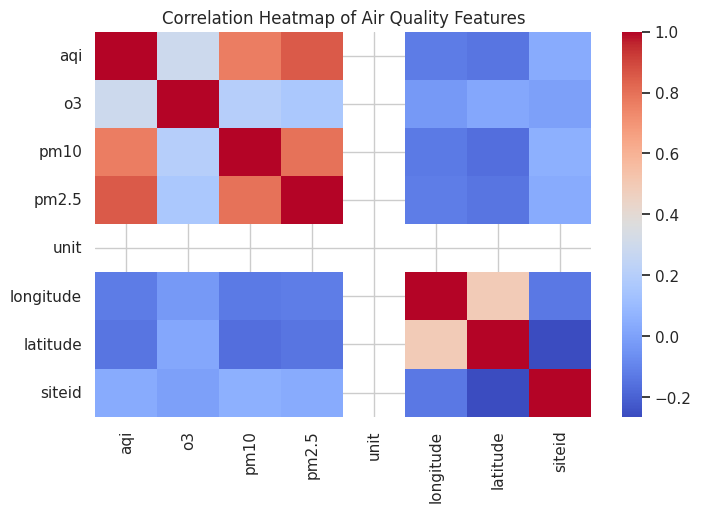

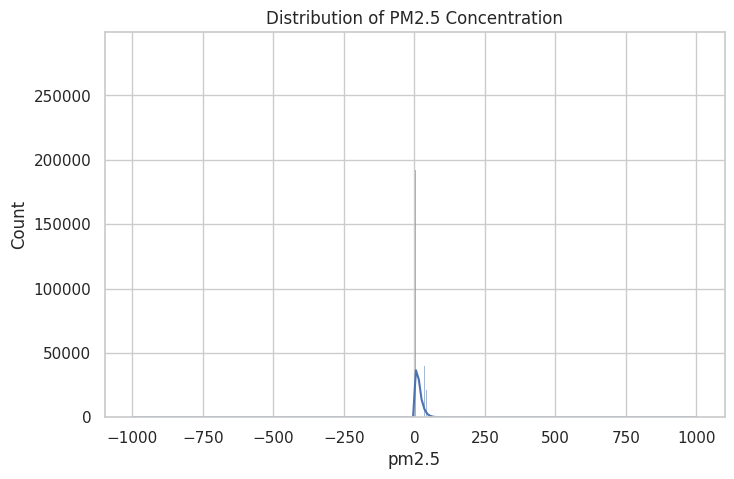

In [9]:
#  Exploratory Data Analysis (EDA)

print("\n--- Statistical Summary ---")
print(df.describe())

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

# Distribution of PM2.5
if 'pm2.5' in df.columns:
    sns.histplot(df['pm2.5'], kde=True)
    plt.title("Distribution of PM2.5 Concentration")
    plt.show()


In [10]:
# Convert Categorical to Numerical

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("Converted Categorical Columns to Numeric")

Converted Categorical Columns to Numeric


In [11]:
#  Feature Selection
# If AQI or PM2.5 is the target, adjust accordingly
target_col = 'pm2.5' if 'pm2.5' in df.columns else 'AQI'

# Remove the 'unit' column as it has zero variance and won't be useful for modeling
X = df.drop([target_col, 'unit'], axis=1)
y = df[target_col]

# Handle potential infinite values before scaling
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#  Split Data into Train/Test

# Take a smaller random sample for faster exploration (e.g., 100000 rows)
sample_size = 20
df_sampled = df.sample(n=min(sample_size, len(df)), random_state=42)

target_col = 'pm2.5' if 'pm2.5' in df_sampled.columns else 'AQI'

X_sampled = df_sampled.drop(target_col, axis=1)
y_sampled = df_sampled[target_col]


# Handle potential infinite values before scaling
X_sampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_sampled.fillna(X_sampled.mean(), inplace=True)

# Scale features using the scaler fitted on the full dataset or a subset of the full dataset.
# For now, we will fit a new scaler on the sampled data for speed.
scaler_sampled = StandardScaler()
X_scaled_sampled = scaler_sampled.fit_transform(X_sampled)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_sampled, y_sampled, test_size=0.2, random_state=42
)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Training Samples: 16, Testing Samples: 4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [16]:
#  Model Training & Evaluation

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, rmse])
    print(f"\n {name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")


 Random Forest Results:
R² Score: 0.3074
MAE: 11.3525
RMSE: 15.4855

 XGBoost Results:
R² Score: 0.7643
MAE: 7.6101
RMSE: 9.0341




 Model Comparison:
           Model  R2 Score        MAE       RMSE
0  Random Forest  0.307435  11.352500  15.485496
1        XGBoost  0.764286   7.610078   9.034146


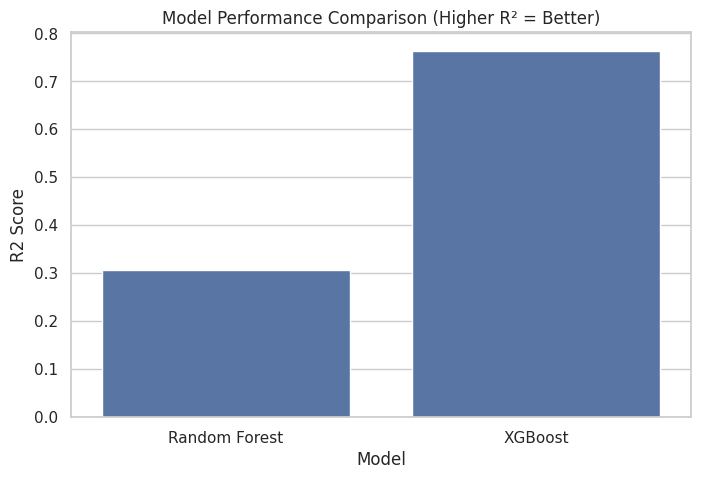

In [17]:
# Compare Models

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "RMSE"])
print("\n\n Model Comparison:")
print(results_df)

sns.barplot(data=results_df, x="Model", y="R2 Score")
plt.title("Model Performance Comparison (Higher R² = Better)")
plt.show()

In [ ]:
# StandardScaler : It ensures all numerical features contribute equally to distance-based learning.
# Heatmap : Heatmap shows correlations between pollutants (e.g., PM2.5 vs O3), which is vital for feature understanding.
# Histogram : visualize distribution and relationships in environmental data.
# RandomForestRegressor : Robust, non-linear, handles missing values, resistant to overfitting, performs well on tabular environmental data.
# XGBoostRegressor : Gradient-boosting ensemble that gives high accuracy and handles large feature spaces efficiently.
# Evaluation Metrics :
# R² Score — Measures model's explanatory power (how much variance is captured).
# MAE & RMSE — Show average prediction errors; RMSE penalizes large deviations more.
# These three give a balanced view of accuracy and stability.